sorr with corr  
file read  
assign diferent classes

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# pd.options.display.max_rows = None
# pd.options.display.max_columns = None

In [3]:
df = sns.load_dataset("titanic")

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.shape

(891, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
missing_percentage =(df.isnull().sum()/len(df))*100

In [9]:
missing_percentage

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [10]:
df.drop("deck", axis = 1, inplace=True)

In [11]:
df.dropna(subset="embarked", axis=0, inplace=True)

In [12]:
df.duplicated().sum()

111

In [13]:
df = df.drop_duplicates()

In [14]:
df["age"].mean()

29.752848664688425

In [15]:
df["age"].value_counts()

age
24.00    29
18.00    25
22.00    24
19.00    23
28.00    22
         ..
36.50     1
0.92      1
23.50     1
55.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [16]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

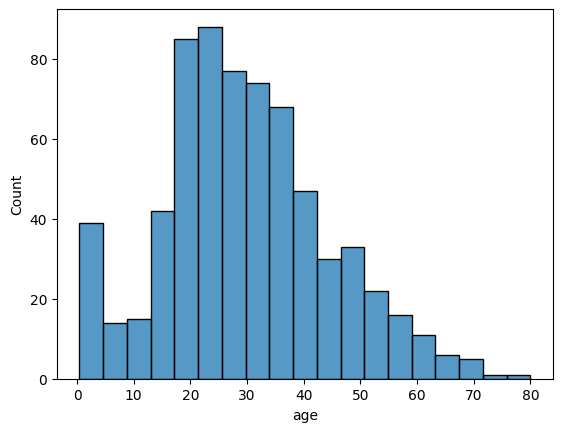

In [17]:
sns.histplot(df["age"])

In [18]:
df["age"]=df["age"].fillna(df["age"].mean())

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

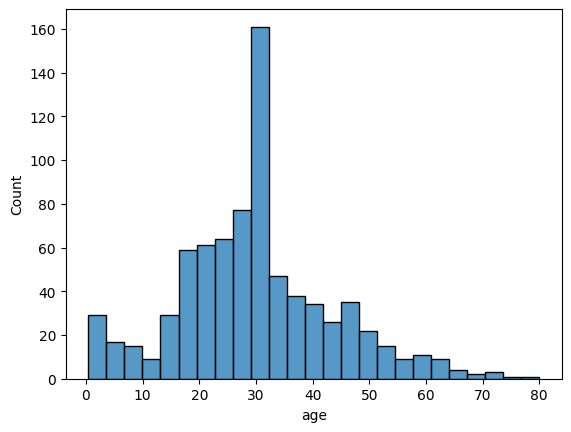

In [19]:
sns.histplot(df["age"])

In [20]:
# #removing outliers
# Q1=np.percentile(data,25)
# Q2=np.percentile(data,75)
# IQR=Q3-Q1
# UB=Q3+1.5*IQR
# LB=-Q1-1.5*IQR


In [21]:
#removing outliers
Q1=np.percentile(df["age"],25)
Q3=np.percentile(df["age"],75)
IQR=Q3-Q1
UB=Q3+1.5*IQR
LB=Q1-1.5*IQR

In [22]:
print(UB)
print(LB)

58.125
-0.875


In [23]:
df["age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
885    39.000000
887    19.000000
888    29.752849
889    26.000000
890    32.000000
Name: age, Length: 778, dtype: float64

In [24]:
print(df["age"]<UB)
print(df["age"]>UB)


0      True
1      True
2      True
3      True
4      True
       ... 
885    True
887    True
888    True
889    True
890    True
Name: age, Length: 778, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
885    False
887    False
888    False
889    False
890    False
Name: age, Length: 778, dtype: bool


In [25]:
print(np.where(df["age"]>UB))

(array([ 33,  53,  89,  90, 109, 161, 217, 236, 257, 262, 302, 335, 396,
       413, 434, 441, 486, 506, 522, 553, 558, 591, 602, 611, 655, 745]),)


In [26]:
print(np.where(df["age"]<LB))

(array([], dtype=int64),)


In [27]:
#df["age"] = np.where(df["age"] > UB, UB, df["age"])

In [28]:
df = df.loc[(df["age"] >= LB) & (df["age"] <= UB)]  # ✅ Removes outliers


In [29]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.752849,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [30]:
# import pandas as pd

# df = pd.DataFrame({'age': [18, 25, 30, 40]})
# df["age_category"] = df["age"].apply(lambda x: "Young" if x < 30 else "Adult")
# print(df)


In [31]:
df["alone"].unique()

array([False,  True])

In [32]:
df["alone"].value_counts()

alone
True     421
False    331
Name: count, dtype: int64

In [33]:
df["alone"] = df["alone"].map(lambda x: 0 if x == False else 1) #0 for no and 1 for yes

In [34]:
df["alone"].unique()

array([0, 1])

In [35]:
df["alone"].value_counts()

alone
1    421
0    331
Name: count, dtype: int64

In [36]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [37]:
df.drop(["sibsp","parch"], inplace=True, axis=1)

In [38]:
df["sex"].unique()

array(['male', 'female'], dtype=object)

In [39]:
df["sex"].value_counts()

sex
male      465
female    287
Name: count, dtype: int64

In [40]:
#df["alone"] = df["alone"].map(lambda x: 0 if x == False else 1)

In [41]:
df["sex"]= df["sex"].map(lambda x: 0 if x=="male" else 1) #0 for male and 1 for female

In [42]:
df["survived"].unique()

array([0, 1])

In [43]:
df["pclass"].unique()

array([3, 1, 2])

In [44]:
df["fare"].value_counts()

fare
13.0000    31
26.0000    29
8.0500     25
7.8958     20
10.5000    20
           ..
32.5000     1
6.8583      1
12.6500     1
8.6542      1
10.5167     1
Name: count, Length: 241, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fare', ylabel='Count'>

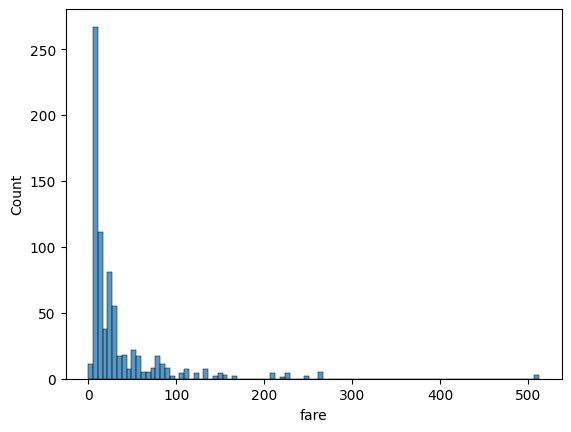

In [45]:
sns.histplot(df["fare"])

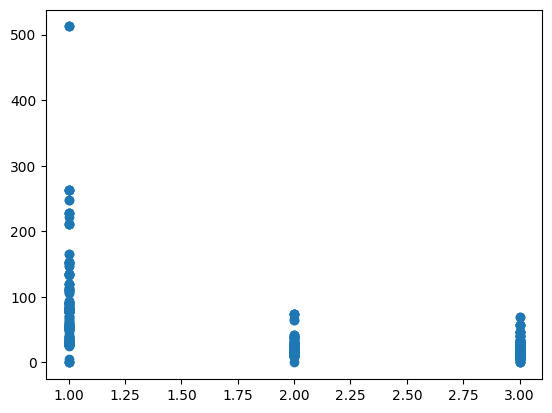

In [46]:
plt.scatter(x=df["pclass"], y=df["fare"])

In [47]:
df

,survived,pclass,sex,age,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,0,22.000000,7.2500,S,Third,man,True,Southampton,no,0
1,1,1,1,38.000000,71.2833,C,First,woman,False,Cherbourg,yes,0
2,1,3,1,26.000000,7.9250,S,Third,woman,False,Southampton,yes,1
3,1,1,1,35.000000,53.1000,S,First,woman,False,Southampton,yes,0
4,0,3,0,35.000000,8.0500,S,Third,man,True,Southampton,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,1,39.000000,29.1250,Q,Third,woman,False,Queenstown,no,0
887,1,1,1,19.000000,30.0000,S,First,woman,False,Southampton,yes,1
888,0,3,1,29.752849,23.4500,S,Third,woman,False,Southampton,no,0
889,1,1,0,26.000000,30.0000,C,First,man,True,Cherbourg,yes,1


In [48]:
#removing outliers
Q1=np.percentile(df["fare"],25)
Q3=np.percentile(df["fare"],75)
IQR=Q3-Q1
UB=Q3+1.5*IQR
LB=Q1-1.5*IQR

In [49]:
df= df.loc[(df["fare"]<=UB) & (df["fare"]>=LB)]
#df = df.loc[(df["age"] >= LB) & (df["age"] <= UB)]

In [50]:
df

,survived,pclass,sex,age,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,0,22.000000,7.2500,S,Third,man,True,Southampton,no,0
2,1,3,1,26.000000,7.9250,S,Third,woman,False,Southampton,yes,1
3,1,1,1,35.000000,53.1000,S,First,woman,False,Southampton,yes,0
4,0,3,0,35.000000,8.0500,S,Third,man,True,Southampton,no,1
5,0,3,0,29.752849,8.4583,Q,Third,man,True,Queenstown,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,1,39.000000,29.1250,Q,Third,woman,False,Queenstown,no,0
887,1,1,1,19.000000,30.0000,S,First,woman,False,Southampton,yes,1
888,0,3,1,29.752849,23.4500,S,Third,woman,False,Southampton,no,0
889,1,1,0,26.000000,30.0000,C,First,man,True,Cherbourg,yes,1


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fare', ylabel='Count'>

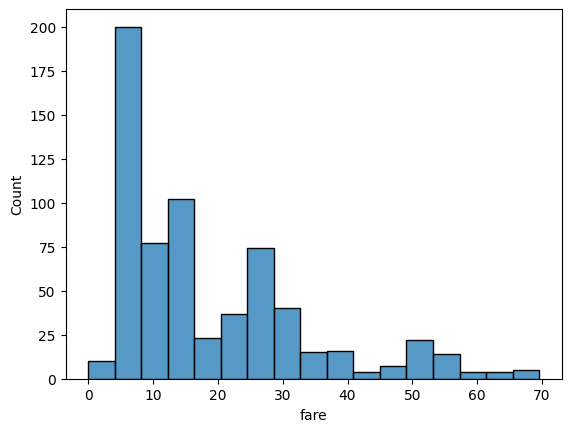

In [51]:
sns.histplot(df["fare"])

In [52]:
df.drop(["class"], inplace=True, axis=1)

<ipython-input-52-ce936371e026>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["class"], inplace=True, axis=1)


In [53]:
df.drop(["embark_town","adult_male","alive","who"], inplace=True, axis=1)

<ipython-input-53-965b5bc3c470>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["embark_town","adult_male","alive","who"], inplace=True, axis=1)


In [54]:
df["embarked"] = df["embarked"].apply(lambda x: 0 if x=="S" else(1 if x=="Q" else 2))

<ipython-input-54-a966e910edb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["embarked"] = df["embarked"].apply(lambda x: 0 if x=="S" else(1 if x=="Q" else 2))


In [55]:
df["embarked"].unique()

array([0, 1, 2])

In [56]:
df["embarked"].value_counts()

embarked
0    498
2    102
1     54
Name: count, dtype: int64

In [57]:
# reason_columns = pd.get_dummies(df['Reason for Absence'], drop_first=True)
# reason_columns

In [58]:
df["fare"].describe()

count    654.000000
mean      19.213404
std       14.440023
min        0.000000
25%        7.895800
50%       13.000000
75%       26.274975
max       69.550000
Name: fare, dtype: float64

In [59]:
# reason_type_1 = reason_columns.loc[:, 1:14].max(axis=1)
# reason_type_2 = reason_columns.loc[:, 15:17].max(axis=1)
# reason_type_3 = reason_columns.loc[:, 18:21].max(axis=1)
# reason_type_4 = reason_columns.loc[:, 22:28].max(axis=1)

In [60]:
#df = pd.concat([df, reason_type_1, reason_type_2, reason_type_3, reason_type_4], axis=1)

In [61]:
#sorted(df['Reason for Absence'].unique())

In [62]:
#df.columns = new_columns

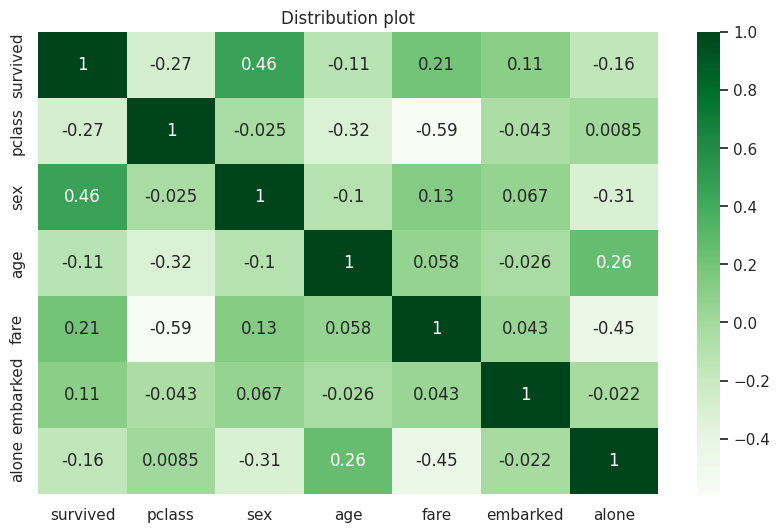

In [63]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Greens')
plt.title('Distribution plot')
plt.show()

In [64]:
df["sex"].unique()

array([0, 1])

In [65]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

#### simple linear regression

In [66]:
lr = LinearRegression()

In [67]:
x=df["fare"]

In [68]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'fare', 'embarked', 'alone'], dtype='object')

In [69]:
x = x.values.reshape(-1,1)
x

array([[ 7.25  ],
       [ 7.925 ],
       [53.1   ],
       [ 8.05  ],
       [ 8.4583],
       [51.8625],
       [21.075 ],
       [11.1333],
       [30.0708],
       [16.7   ],
       [26.55  ],
       [ 8.05  ],
       [31.275 ],
       [ 7.8542],
       [16.    ],
       [29.125 ],
       [13.    ],
       [18.    ],
       [ 7.225 ],
       [26.    ],
       [13.    ],
       [ 8.0292],
       [35.5   ],
       [21.075 ],
       [31.3875],
       [ 7.225 ],
       [ 7.8792],
       [ 7.8958],
       [27.7208],
       [ 7.75  ],
       [52.    ],
       [ 7.2292],
       [ 8.05  ],
       [18.    ],
       [11.2417],
       [ 9.475 ],
       [21.    ],
       [ 7.8958],
       [41.5792],
       [ 7.8792],
       [ 8.05  ],
       [15.5   ],
       [21.6792],
       [17.8   ],
       [39.6875],
       [ 7.8   ],
       [26.    ],
       [35.5   ],
       [10.5   ],
       [ 7.2292],
       [27.75  ],
       [46.9   ],
       [ 7.2292],
       [27.9   ],
       [27.7208],
       [15

In [70]:
y=df["survived"]
y

0      0
2      1
3      1
4      0
5      0
      ..
885    0
887    1
888    0
889    1
890    0
Name: survived, Length: 654, dtype: int64

In [71]:
model=LinearRegression()

In [72]:
y

0      0
2      1
3      1
4      0
5      0
      ..
885    0
887    1
888    0
889    1
890    0
Name: survived, Length: 654, dtype: int64

In [73]:
x_train, x_test, y_train, y_test =  train_test_split(x, y , test_size=0.25, random_state=0)

In [74]:
model.fit(x_test,y_test)

LinearRegression()

In [75]:
y_pred = model.predict(x_test)

In [76]:
y_pred

array([0.32638201, 0.51541927, 0.37634348, 0.43681121, 0.32733922,
       0.32381213, 0.43832291, 0.32225025, 0.32267836, 0.37332009,
       0.3264576 , 0.32751578, 0.39297211, 0.32585292, 0.49425556,
       0.44013694, 0.36727332, 0.32328304, 0.35820316, 0.37332009,
       0.43832291, 0.32708767, 0.36666864, 0.46870794, 0.43681121,
       0.32733922, 0.3634185 , 0.44739307, 0.41479068, 0.56318878,
       0.44739307, 0.43832291, 0.43681121, 0.51904733, 0.34308622,
       0.3649048 , 0.58493177, 0.44013694, 0.32330844, 0.32330844,
       0.32585292, 0.66270839, 0.34308622, 0.45570738, 0.46870794,
       0.32751578, 0.32222486, 0.4363831 , 0.32708767, 0.59737845,
       0.32330844, 0.46402169, 0.43854966, 0.4472165 , 0.33703945,
       0.44830008, 0.44739307, 0.44013694, 0.35820316, 0.32330844,
       0.34308622, 0.62426119, 0.35820316, 0.41277529, 0.57891039,
       0.32328304, 0.32267836, 0.32827163, 0.371783  , 0.32330844,
       0.2795951 , 0.52222189, 0.32733922, 0.37694816, 0.53101

In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [78]:
print('mean square error:', mean_squared_error(y_pred, y_test))
print('mean absolute error:', mean_absolute_error(y_pred, y_test))
print('r2 score:', r2_score(y_pred, y_test))

mean square error: 0.2313527050860151
mean absolute error: 0.4627054101720302
r2 score: -28.276989424998416


In [79]:
#Logistic Regression

In [80]:
x=df.drop("survived", axis=1)
x

,pclass,sex,age,fare,embarked,alone
0,3,0,22.000000,7.2500,0,0
2,3,1,26.000000,7.9250,0,1
3,1,1,35.000000,53.1000,0,0
4,3,0,35.000000,8.0500,0,1
5,3,0,29.752849,8.4583,1,1
...,...,...,...,...,...,...
885,3,1,39.000000,29.1250,1,0
887,1,1,19.000000,30.0000,0,1
888,3,1,29.752849,23.4500,0,0
889,1,0,26.000000,30.0000,2,1


In [81]:
x_train, x_test, y_train, y_test =  train_test_split(x, y , test_size=0.25, random_state=0)

In [82]:
model =LogisticRegression()

In [83]:
model.fit(x_test,y_test)

LogisticRegression()

In [84]:
y_pred = model.predict(x_test)

In [85]:
from sklearn.metrics import classification_report, confusion_matrix

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.823170731707317

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85        99
           1       0.77      0.78      0.78        65

    accuracy                           0.82       164
   macro avg       0.81      0.82      0.82       164
weighted avg       0.82      0.82      0.82       164



#### polynomial regression

In [88]:
from sklearn.preprocessing import PolynomialFeatures

In [89]:
plr = PolynomialFeatures()

In [90]:
x_trainp = plr.fit_transform(x_train)


In [91]:
x_testp = plr.fit_transform(x_test)

In [92]:
model = LinearRegression()

In [93]:
model.fit(x_trainp, y_train)

LinearRegression()

In [94]:
y_pred = model.predict(x_testp)

In [95]:
print('mean square error:', mean_squared_error(y_pred, y_test))
print('mean absolute error:', mean_absolute_error(y_pred, y_test))
print('r2 score:', r2_score(y_pred, y_test))

mean square error: 0.15376896140862056
mean absolute error: 0.3128389884956371
r2 score: -1.0159135362243736


#### SVC

In [96]:
from sklearn.svm import SVC

In [97]:
model = SVC(kernel="linear")

In [98]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83        99
           1       0.75      0.66      0.70        65

    accuracy                           0.78       164
   macro avg       0.77      0.76      0.77       164
weighted avg       0.78      0.78      0.78       164



In [99]:
y_pred = model.predict(x_test)

In [100]:
from sklearn.metrics import classification_report

In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83        99
           1       0.75      0.66      0.70        65

    accuracy                           0.78       164
   macro avg       0.77      0.76      0.77       164
weighted avg       0.78      0.78      0.78       164



#### Desicion Tree Classifier

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
model = DecisionTreeClassifier(criterion="entropy") #gini

In [104]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
cm= confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.70      0.76      0.73        99
           1       0.58      0.51      0.54        65

    accuracy                           0.66       164
   macro avg       0.64      0.63      0.63       164
weighted avg       0.65      0.66      0.65       164

[[75 24]
 [32 33]]


In [105]:

# convert labels into binary values

# y[y == 2] = 0

# y[y == 1] = 1

#### XGBoost Classifier

In [106]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=x,label=y)

In [107]:
from xgboost import XGBClassifier

In [108]:
model = XGBClassifier()

In [109]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
cm= confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        99
           1       0.72      0.58      0.64        65

    accuracy                           0.74       164
   macro avg       0.74      0.72      0.72       164
weighted avg       0.74      0.74      0.74       164

[[84 15]
 [27 38]]


In [110]:
accuracy_score(y_test, y_pred)

0.7439024390243902

best accuracy Logistic Regression